In [1]:
import numpy as np,matplotlib.pyplot as plt,scipy as sp

In [2]:
!pip install sodshock

In [3]:
#plot over line in paraview, File > Save Data > csv > select rho, tempererature and  vel_x
profilesLBM=np.loadtxt('profiles.csv',delimiter=",",skiprows=1)

In [4]:
rhoLBM=profilesLBM[:,0]
temperatureLBM=profilesLBM[:,1]
velocityLBM=profilesLBM[:,2]
xLBM=np.linspace(0.0,1.0,rhoLBM.size)

In [5]:
#This cell needs user inputs
#Please match parameters with sod.inp file used in marbles

maxTime=1500 #max_step from the sod.inp file of marbles

nX=3000;nY=1;nZ=1;
dx=dy=dz=1.0

gamma=2.0 #ic_sodTest.adiabaticExponent

rho0=0.50 #ic_sodTest.density
ux0=0.00
uy0=0.00
uz0=0.00
T0=0.20 #ic_sodTest.initialTemperature

densityRatio=4.0 #ic_sodTest.densityRatio
temperatureRatio=0.1250 #ic_sodTest.temperatureRatio

cs=np.sqrt(gamma*T0)

nu=0.010
Prandtl=1.0
alpha=nu/Prandtl

dt=1.0


Positions:
Head of Rarefaction : 0.18377223398316206
Foot of Rarefaction : 0.22841878108735808
Contact Discontinuity : 0.5297643647361306
Shock      : 0.6363334859985355
Regions:
Region 1   : (0.1, 0.5, 0.0)
Region 2   : RAREFACTION
Region 3   : (np.float64(0.08246303682406858), np.float64(0.454045803923097), np.float64(0.05952872947226134))
Region 4   : (np.float64(0.08246303682406858), np.float64(2.558592665183791), np.float64(0.05952872947226134))
Region 5   : (0.05, 2.0, 0.0)


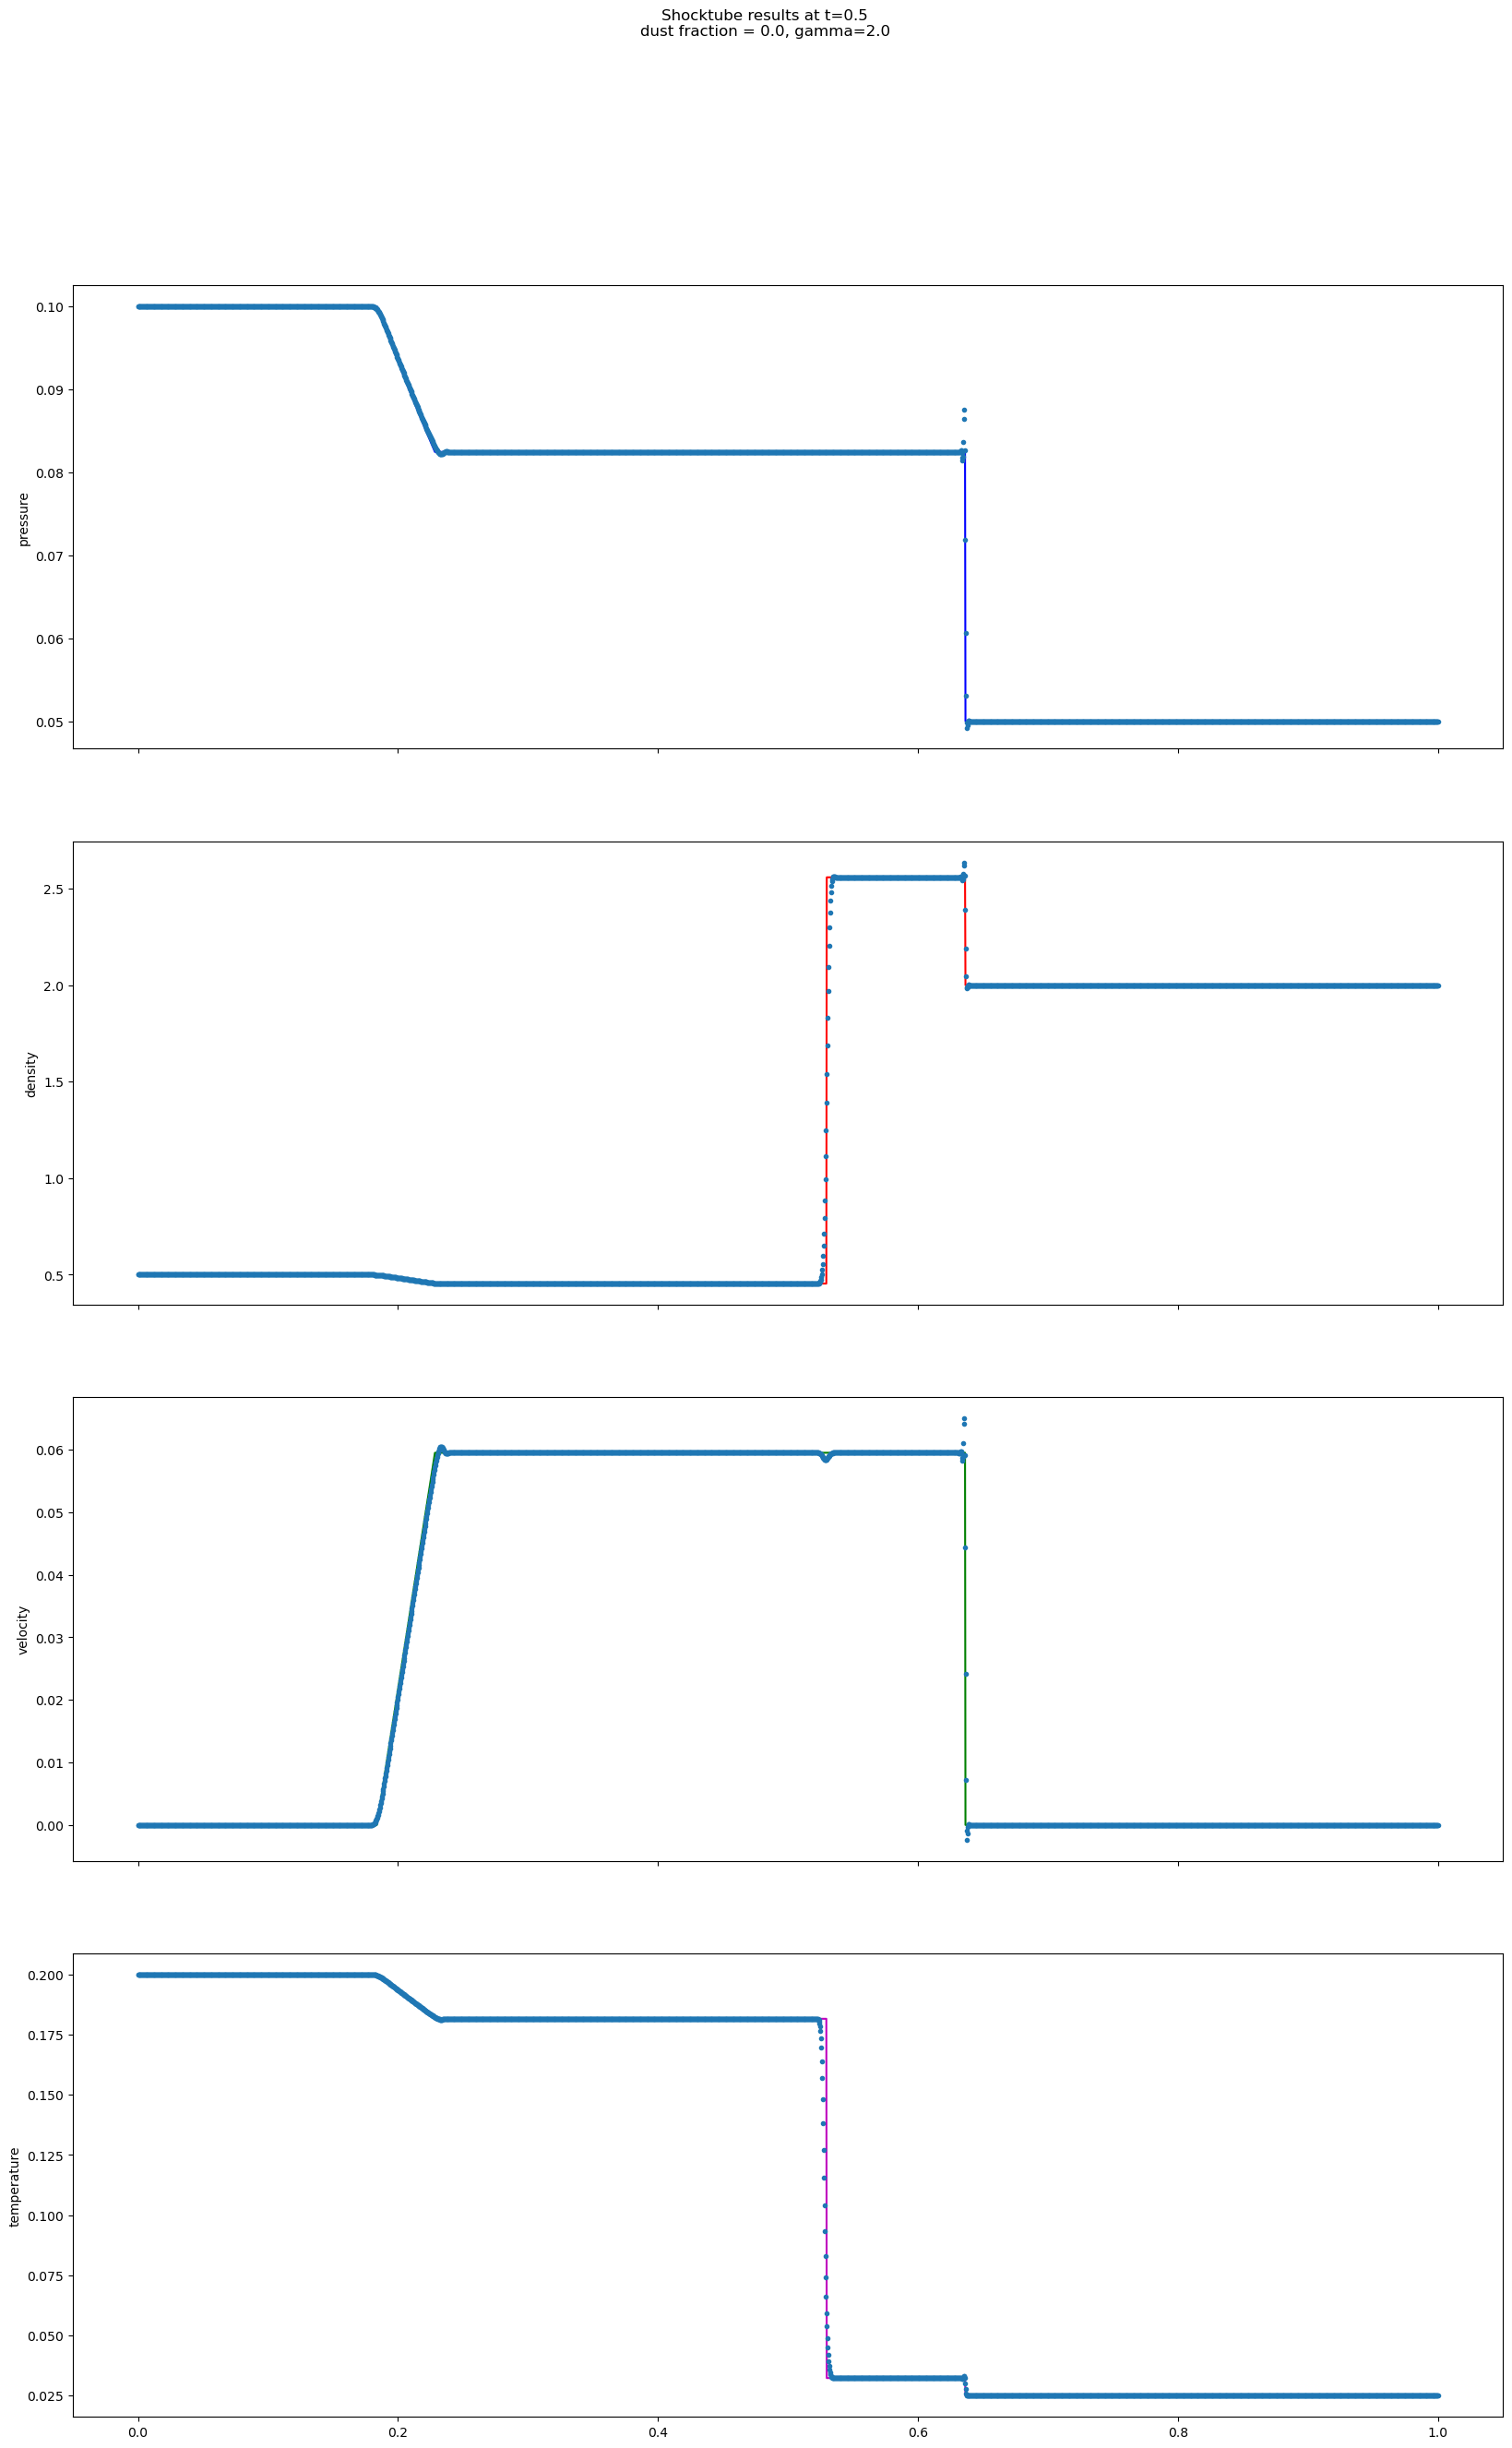

In [6]:
import sodshock


def sodAnalytical(maxTime):
    dustFrac = 0.0
    npts = nX
    t = maxTime/nX
    rho_L=rho0
    rho_R=densityRatio*rho_L
    T_L=T0
    T_R=temperatureRatio*T_L
    left_state = (rho_L*T_L,rho_L,ux0) #P,rho,u
    right_state = (rho_R*T_R,rho_R,ux0)
    positions, regions, values = sodshock.solve(left_state=left_state, \
        right_state=right_state, geometry=(0., 1., 0.5), t=t,
        gamma=gamma, npts=npts, dustFrac=dustFrac)
    # left_state and right_state set pressure, density and u (velocity)
    # geometry sets left boundary on 0., right boundary on 1 and initial
    # position of the shock xi on 0.5
    # t is the time evolution for which positions and states in tube should be
    # calculated
    # gamma denotes specific heat
    # note that gamma and npts are default parameters (1.4 and 500) in solve
    # function
    positions, regions, values = sodshock.solve(left_state=left_state, \
        right_state=right_state, geometry=(0., 1., 0.5), t=t,
        gamma=gamma, npts=npts, dustFrac=dustFrac)
    # Printing positions
    print('Positions:')
    for desc, vals in positions.items():
        print('{0:10} : {1}'.format(desc, vals))

    # Printing p, rho and u for regions
    print('Regions:')
    for region, vals in sorted(regions.items()):
        print('{0:10} : {1}'.format(region, vals))


    # Finally, let's plot the solutions
    f, axarr = plt.subplots(4, sharex=True,figsize=(20, 30))
    #f.figure(figsize=(20, 6), dpi=500)

    axarr[0].plot(values['x'], values['p'], linewidth=1.5, color='b')
    axarr[0].plot(xLBM,rhoLBM*temperatureLBM,'.',label='P')
    axarr[0].set_ylabel('pressure')

    axarr[1].plot(values['x'], values['rho'], linewidth=1.5, color='r')
    axarr[1].plot(xLBM,rhoLBM,'.',label='rho')
    axarr[1].set_ylabel('density')

    axarr[2].plot(values['x'], values['u'], linewidth=1.5, color='g')
    axarr[2].plot(xLBM,velocityLBM,'.',label='ux')
    axarr[2].set_ylabel('velocity')

    axarr[3].plot(values['x'], values['p']/values['rho'], linewidth=1.5, color='m')
    axarr[3].plot(xLBM,temperatureLBM,'.',label='T')
    axarr[3].set_ylabel('temperature')


    plt.suptitle('Shocktube results at t={0}\ndust fraction = {1}, gamma={2}'\
                 .format(t, dustFrac, gamma))
    plt.show()

sodAnalytical(maxTime)